# Theoretical Foundations of Computer Science II COMP2870

**School of Computer Science, University of Leeds**

# Lab03: Linear systems of equations

These labsheets contains *formative activities* (which contribute to your learning) and *summative activities* (which you will complete and submit to be assessed as part of your portfolio).

<div class="alert alert-block alert-danger">
<b>Portfolio exercise</b>

Exercise marked with a red box is a summative exercise and must be submitted as part of your portfolio. You should use Gradescope to submit portfolio activities.
</div>

### Expectations

1. **Timeliness** You should complete all of the activities in the order provided and submit your portfolio evidence on Gradescope before the completion date (Friday 14 November, 5pm).

2. **Presentation** You should present all of your work clearly and concisely following additional guidance below.

3. **Integrity** You are responsible for ensuring that all the evidence you submit as part of your portfolio is entirely your own work. You can find out more about Academic integrity on the Skill@library website. All work you submit for assessment is subject to the academic integrity policy.

### Feedback
Feedback on formative activities will be provided via lab classess and tutorials. Feedback on evidence submitted as part of the portfolio will be available on Gradescope.

### Support opportunities
Support with the activity sheet is available in the lab classes and tutorials. Individual support is available via the online booking system.

### Statement on the Use of Generative AI (Red Category)
This assessment is RED according to the GenAI traffice light system. **Generative AI (GenAI) tools cannot be used**. The aim of this task is for you to develop and demonstrate the specific skills and knowledge covered in the taught sessions. We want you to independently develop your understanding, criticical thinking skills and demonstrate fundamental skills that will be required throughout your programme. Reliance on GenAI could prevent you from achieving the intended learning outcomes and may impeded your skill development.

You are still permitted to use dictionaries, thesauri, spelling and grammer-checking software to help identify and correct spelling mistakes and grammatrical errors (even if they are powered by GenAI). However, you should not use any software to rewrite sentence or make substantial changes to your original text, as this would be against the rules of this category.

Failure to comply with these requirements may be considered academic misconduct under University regulations.

### Expected time for completion:
1-2 hours

### Expected completion date:
Friday 14 November, 5pm

## Coursework summary

This lab covers material on how to solve systems of linear equations.

## Learning outcomes

On completion of this activity sheet you will have demonstrated that you can:

- apply direct and iterative solvers to solve systems of linear equations; implement methods using floating point numbers and investigate computational cost using computer experiments

## How to access the lab

You can access the lab worksheet directly through [minerva](https://minerva.leeds.ac.uk/), [github](https://github.com/COMP2870-2526/linear-algebra-student-labs) or using Noteable (accessible via Minerva - see `README.md` for detailed instructions).

These lab worksheets are written using ['Jupyter Notebooks'](https://jupyter.org/). Many, many tutorials and guides are [available online](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).

First some helper code for generating good matrices for LU factorisation tests. 

In [2]:
import numpy as np
from scipy.sparse import diags


def generate_safe_system(n):
    """
    Generate a linear system A x = b where A is strictly diagonally dominant,
    ensuring LU factorization without pivoting will work.

    Parameters:
        n (int): Size of the system (n x n)

    Returns:
        A (ndarray): n x n strictly diagonally dominant matrix
        b (ndarray): RHS vector
        x_true (ndarray): The true solution vector
    """

    k = [np.ones(n - 1), -2 * np.ones(n), np.ones(n - 1)]
    offset = [-1, 0, 1]
    A = diags(k, offset).toarray()

    # Solution is always all ones
    x_true = np.ones((n, 1))

    # Compute b = A @ x_true
    b = A @ x_true

    return A, b, x_true

## Exercise 1: LU factorisation

<div class="alert alert-block alert-danger">
<b>Portfolio exercise</b>
You should submit:

1. Your code for `lu_factorisation`
2. The determinant of `A_large` from Exercise 1.3.
3. The plot of run times for LU factorisation (your code) and Gaussian elimination (from the notes)
</div>

1. Implement the algorithm for LU factorisation as described [in the
notes](https://comp2870-2526.github.io/linear-algebra-notes/src/lec04.html#sec-LU-factorisation).
You should implement a Python function which accepts an $n \times n$
matrix $A$ represented as a numpy array and returns one lower triangular
matrix $L$ and one upper triangular matrix $U$ with $A = LU$.

    Here is some starter code:

In [3]:
def lu_factorisation(A):
    """
    Compute the LU factorisation of a square matrix A.

    The function decomposes a square matrix ``A`` into the product of a lower
    triangular matrix ``L`` and an upper triangular matrix ``U`` such that:

    .. math::
        A = L U

    where ``L`` has unit diagonal elements and ``U`` is upper triangular.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D NumPy array of shape ``(n, n)`` representing the square matrix to
        factorise.

    Returns
    -------
    L : numpy.ndarray
        A lower triangular matrix with shape ``(n, n)`` and unit diagonal.
    U : numpy.ndarray
        An upper triangular matrix with shape ``(n, n)``.
    """
    n, m = A.shape
    if n != m:
        raise ValueError(f"Matrix A is not square {A.shape=}")

    # construct arrays of zeros
    L, U = np.zeros_like(A), np.zeros_like(A)

    # ...
    L[0, 0] = 1
    U[0, 0] = 1

    for i in range(n):
        L[i,i] = 1
        

    for j in range(n):
        for i in range(j+1):
            # Compute factors u_{ij}
            U[i][j] = A[i][j]
            for k in range(0, i):
                U[i][j] -= U[k][j] * L[i][k]
            

        for i in range(j+1, n):
            #Compute factors l_{ij}
            L[i][j] = A[i][j]
            for k in range(0, j):
                L[i][j] -= L[i][k] * U[k][j]
            
            L[i][j] /= U[j][j]

    return L, U


A = np.array([[4,2,0],[2,3,1],[0,1,2.5]], dtype = float)
print(lu_factorisation(A)[0])

print(lu_factorisation(A)[1])

[[1.  0.  0. ]
 [0.5 1.  0. ]
 [0.  0.5 1. ]]
[[4. 2. 0.]
 [0. 2. 1.]
 [0. 0. 2.]]


2. Test your solution on the matrix $A$:
   $$
   A = \begin{pmatrix}
   4 & 2 & 0 \\ 2 & 3 & 1 \\ 0 & 1 & 2.5
   \end{pmatrix}.
   $$
   First compute the LU factorisation by hand and then check $A = L U$.

3. Consider the large matrix given by:

In [4]:
A_large, b_large, x_large = generate_safe_system(100)

We can use the LU factorisation as another way to compute the determinant of a matrix.
We can use the fact that we can easily compute the determinant of triangular matrix and that $\det(XY) = \det(X) \det(Y)$.

Use this following code to determine the determinant of `A`:

In [ ]:
def determinant(A):
    n = A.shape[0]
    L, U = lu_factorisation(A)

    det_L = 1.0
    det_U = 1.0

    for i in range(n):
        det_L *= L[i, i]
        det_U *= U[i, i]

    return det_L * det_U

print(determinant(A))

4. Combine your implementation of LU factorisation with the forwards and
backwards solve from the lecture notes to create a solver for a system
of linear equations. Compare how long it takes for each part of your
code to run against the code for Gaussian elimination from the lecture
notes.

    Use the following code as a starter:

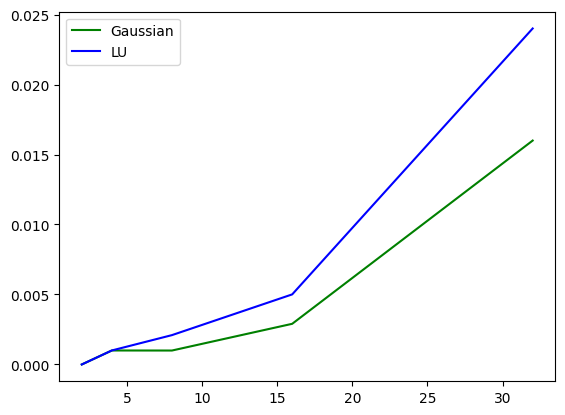

In [34]:

def forward_substitution(A, b):
    """
    Solve a lower triangular system of linear equations using forward
    substitution.

    This function solves the system of equations:

    .. math::
        A x = b

    where `A` is a **lower triangular matrix** (all elements above the main
    diagonal are zero). The solution vector `x` is computed sequentially by
    solving each equation starting from the first row.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D NumPy array of shape ``(n, n)`` representing the lower triangular
        coefficient matrix of the system.
    b : numpy.ndarray
        A 1D NumPy array of shape ``(n,)`` or a 2D NumPy array of shape
        ``(n, 1)`` representing the right-hand side vector.

    Returns
    -------
    x : numpy.ndarray
        A NumPy array of shape ``(n,)`` containing the solution vector.
    """
    """
    solves the system of linear equationa Ax = b assuming that A is lower
    triangular. returns the solution x
    """
    # get size of system
    n = system_size(A, b)

    # check is lower triangular
    if not np.allclose(A, np.tril(A)):
        raise ValueError("Matrix A is not lower triangular")

    # create solution variable
    x = np.empty_like(b)

    # perform forwards solve
    for i in range(n):
        partial_sum = 0.0
        for j in range(0, i):
            partial_sum += A[i, j] * x[j]
        x[i] = 1.0 / A[i, i] * (b[i] - partial_sum)

    return x


def backward_substitution(A, b):
    """
    Solve an upper triangular system of linear equations using backward
    substitution.

    This function solves the system of equations:

    .. math::
        A x = b

    where `A` is an **upper triangular matrix** (all elements below the main
    diagonal are zero). The solution vector `x` is computed starting from the
    last equation and proceeding backward.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D NumPy array of shape ``(n, n)`` representing the upper triangular
        coefficient matrix of the system.
    b : numpy.ndarray
        A 1D NumPy array of shape ``(n,)`` or a 2D NumPy array of shape
        ``(n, 1)`` representing the right-hand side vector.

    Returns
    -------
    x : numpy.ndarray
        A NumPy array of shape ``(n,)`` containing the solution vector.
    """
    # get size of system
    n = system_size(A, b)

    # check is upper triangular
    assert np.allclose(A, np.triu(A))

    # create solution variable
    x = np.empty_like(b)

    # perform backwards solve
    for i in range(n - 1, -1, -1):  # iterate over rows backwards
        partial_sum = 0.0
        for j in range(i + 1, n):
            partial_sum += A[i, j] * x[j]
        x[i] = 1.0 / A[i, i] * (b[i] - partial_sum)

    return x
def row_swap(A, b, p, q):
    """
    Swap two rows in a linear system of equations in place.

    This function swaps the rows `p` and `q` of the coefficient matrix `A`
    and the right-hand side vector `b` for a linear system of equations
    of the form ``Ax = b``. The operation is performed **in place**, modifying
    the input arrays directly.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D NumPy array of shape ``(n, n)`` representing the coefficient matrix
        of the linear system.
    b : numpy.ndarray
        A 2D NumPy array of shape ``(n, 1)`` representing the right-hand side
        vector of the system.
    p : int
        The index of the first row to swap. Must satisfy ``0 <= p < n``.
    q : int
        The index of the second row to swap. Must satisfy ``0 <= q < n``.

    Returns
    -------
    None
        This function modifies `A` and `b` directly and does not return
        anything.
    """
    # get system size
    n = system_size(A, b)
    # swap rows of A
    for j in range(n):
        A[p, j], A[q, j] = A[q, j], A[p, j]
    # swap rows of b
    b[p, 0], b[q, 0] = b[q, 0], b[p, 0]


def row_scale(A, b, p, k):
    """
    Scale a row of a linear system by a constant factor in place.

    This function multiplies all entries in row `p` of the coefficient matrix
    `A` and the corresponding entry in the right-hand side vector `b` by a
    scalar `k`. The operation is performed **in place**, modifying the input
    arrays directly.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D NumPy array of shape ``(n, n)`` representing the coefficient matrix
        of the linear system.
    b : numpy.ndarray
        A 2D NumPy array of shape ``(n, 1)`` representing the right-hand side
        vector of the system.
    p : int
        The index of the row to scale. Must satisfy ``0 <= p < n``.
    k : float
        The scalar multiplier applied to the entire row.

    Returns
    -------
    None
        This function modifies `A` and `b` directly and does not return
        anything.
    """
    n = system_size(A, b)

    # scale row p of A
    for j in range(n):
        A[p, j] = k * A[p, j]
    # scale row p of b
    b[p, 0] = b[p, 0] * k


def row_add(A, b, p, k, q):
    """
    Perform an in-place row addition operation on a linear system.

    This function applies the elementary row operation:

    ``row_p ← row_p + k * row_q``

    where `row_p` and `row_q` are rows in the coefficient matrix `A` and the
    right-hand side vector `b`. It updates the entries of `A` and `b`
    **in place**, directly modifying the original data.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D NumPy array of shape ``(n, n)`` representing the coefficient matrix
        of the linear system.
    b : numpy.ndarray
        A 2D NumPy array of shape ``(n, 1)`` representing the right-hand side
        vector of the system.
    p : int
        The index of the row to be updated (destination row). Must satisfy
        ``0 <= p < n``.
    k : float
        The scalar multiplier applied to `row_q` before adding it to `row_p`.
    q : int
        The index of the source row to be scaled and added. Must satisfy
        ``0 <= q < n``.
    """
    n = system_size(A, b)

    # Perform the row operation
    for j in range(n):
        A[p, j] = A[p, j] + k * A[q, j]

    # Update the corresponding value in b
    b[p, 0] = b[p, 0] + k * b[q, 0]

def gaussian_elimination(A, b, verbose=False):
    """
    Perform Gaussian elimination to reduce a linear system to upper triangular
    form.

    This function performs **forward elimination** to transform the coefficient
    matrix `A` into an upper triangular matrix, while applying the same
    operations to the right-hand side vector `b`. This is the first step in
    solving a linear system of equations of the form ``Ax = b`` using Gaussian
    elimination.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D NumPy array of shape ``(n, n)`` representing the coefficient matrix
        of the system.
    b : numpy.ndarray
        A 2D NumPy array of shape ``(n, 1)`` representing the right-hand side
        vector.
    verbose : bool, optional
        If ``True``, prints detailed information about each elimination step,
        including the row operations performed and the intermediate forms of
        `A` and `b`. Default is ``False``.

    Returns
    -------
    None
        This function modifies `A` and `b` **in place** and does not return
        anything.
    """
    # find shape of system
    n = system_size(A, b)

    # perform forwards elimination
    for i in range(n - 1):
        # eliminate column i
        if verbose:
            print(f"eliminating column {i}")
        for j in range(i + 1, n):
            # row j
            factor = A[j, i] / A[i, i]
            if verbose:
                print(f"  row {j} |-> row {j} - {factor} * row {i}")
            row_add(A, b, j, -factor, i)

        if verbose:
            print()
            print("new system")
            print_array(A)
            print_array(b)
            print()

def system_size(A, b):
    """
    Validate the dimensions of a linear system and return its size.

    This function checks whether the given coefficient matrix `A` is square
    and whether its dimensions are compatible with the right-hand side vector
    `b`. If the dimensions are valid, it returns the size of the system.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D array of shape ``(n, n)`` representing the coefficient matrix of
        the linear system.
    b : numpy.ndarray
        A array of shape ``(n, o)`` representing the right-hand side vector.

    Returns
    -------
    int
        The size of the system, i.e., the number of variables `n`.

    Raises
    ------
    ValueError
        If `A` is not square or if the size of `b` does not match the number of
        rows in `A`.
    """

    # Validate that A is a 2D square matrix
    if A.ndim != 2:
        raise ValueError(f"Matrix A must be 2D, but got {A.ndim}D array")

    n, m = A.shape
    if n != m:
        raise ValueError(f"Matrix A must be square, but got A.shape={A.shape}")

    if b.shape[0] != n:
        raise ValueError(
            f"System shapes are not compatible: A.shape={A.shape}, "
            f"b.shape={b.shape}"
        )

    return n

sizes = [2**j for j in range(1, 6)]

import matplotlib.pyplot as plt
import time

t_gauss = []
t_lu = []

for n in sizes:
    # generate a random system of linear equations of size n
    A, b, x = generate_safe_system(n)
    _A, _b, _x = (A.copy(), b.copy(), x.copy())

    # do the solve
    now = time.time()
    gaussian_elimination(A, b)
    x=backward_substitution(A,b)
    t_gauss.append(time.time()-now)
    

    now = time.time()
    L, U = lu_factorisation(_A)
    
    y = backward_substitution(U, _b)
    _x = forward_substitution(L, y)
    t_lu.append(time.time()-now)

 

plt.plot(sizes, t_gauss, color="green", label="Gaussian")
plt.plot(sizes, t_lu, color="blue", label="LU")

plt.legend() 
plt.show()


## Exercise 2: LU factorisation with pivoting (Extension)

We can improve the stability of LU factorisation by additionally
including a pivoting step. In this way, we compute a factorisation:
$$
P A = L U.
$$

The new algorithm looks like:

1.  Initialise $P = I_n$ (the $n \times n$ identity), $L = O_n$ (the
    $n \times n$ zero matrix) and $U = O_n$.

2.  For $k = 1, \ldots n$:

    1.  Find the pivot row with the largest $|A_{ik}|$ for
        $i = k, \ldots, n$. Swap rows $k$ and $p$ in $A$ and store this
        swap in $P$.
    2.  Continue with LU factorisation in column $k$ as usual.
    3.  Repeat for next column $k+1$.

Implement this new method and test on the system of linear equations
given by:
$$
\begin{pmatrix}
10 & -7 & 0 \\ -3 & 2.1 - \varepsilon & 6 \\ 5 & -1 & 5
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\x_3
\end{pmatrix}
= \begin{pmatrix}
7 \\ 9.9 + \varepsilon \\ 11
\end{pmatrix}.
$$
Test with $\varepsilon = 10^{-14}$.